In [6]:
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np
from datetime import datetime
%matplotlib inline

def days_in(start_date, end_date):
    return (datetime.strptime(end_date, '%Y-%m-%d') - datetime.strptime(start_date, '%Y-%m-%d')). days

df = pd.read_csv('weight-data.csv')
df = df.sort_values(by='日期')
ds = days_in(df['日期'].min(), df['日期'].max()) + 1

In [7]:
avg = (df['体重'].max() - df['体重'].min()) / ds
avgs = pd.Series([avg for x in range(ds)])

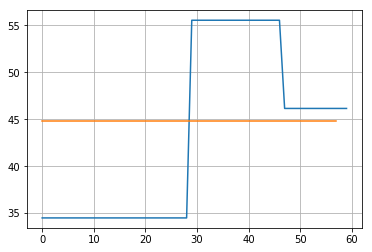

In [8]:
p_avgs = pd.Series()
interpolated = pd.Series()
for i in range(2, df.shape[0] + 1):
    (w0, ) = df[i - 2:i - 1]['体重']
    (w1, ) = df[i - 1:i]['体重']
    (s, ) = df[i - 2:i - 1]['日期']
    (e, ) = df[i - 1:i]['日期']
    days = days_in(s, e) + 1
    tmp_avg = (w1 - w0) / days
    tmp_avgs = pd.Series([tmp_avg for x in range(days + 1)])
    p_avgs = p_avgs.append(tmp_avgs, ignore_index=True)
    
    tmp_inc = pd.Series([w0 + y * tmp_avg for y in range(days)])
    interpolated = interpolated.append(tmp_inc , ignore_index=True)

plt.grid()
plt.plot(p_avgs)
plt.plot(avgs)

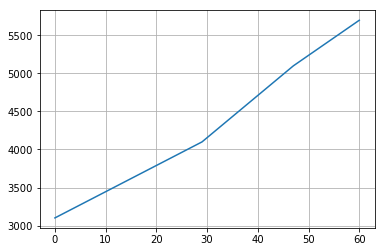

In [9]:
interpolated = interpolated.append(pd.Series([df['体重'][df.shape[0] - 1]]), ignore_index=True)
#interpolated
plt.grid()
plt.plot(interpolated)